Nesta aula vamos analisar alguns classificadores e verificar como eles funcionam. 


- KNN (K-nearest neighbors)
- Support Vector Machines
- Árvores de decisão 
- Random Forests
- Perceptron
- Redes Neurais

### KNN (K-nearest neighbors)

K-nearest neighbors significa K-Vizinhos mais próximos. É um algoritmo de classificacão supervisionado baseado em instâncias que realiza a classificação através do cálculo da distância entre ele e seus K-Vizinhos mais próximos. 



O KNN determina a class de dado pelo principio do voto majoritário. Se nós setamos K=5, as classes dos 5 pontos mais próximos são checados para realizar a classificação. 

<div>
<img src="imagens/classificadores/knn.png" width="300"/>
</div>

**E como a distância é calculada?**

A maneira mais comum  de calcular a distância entre dois pointos é através distância euclediana. A distância euclidiana é dada pela raiz quadrada da diferença entre as coordenas x e y dos pontos.

As demais distâncias podem ser vistas abaixo:



<div>
<img src="imagens/classificadores/medidas-distancia.png" width="450"/>
</div>


Para saber mais como utilizar cada distância e pontos fortes e fracos de cada uma visite o link abaixo

https://ichi.pro/pt/9-medidas-de-distancia-em-ciencia-de-dados-159983401462266

----

In [62]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt #data visualization

from sklearn.datasets import make_blobs #synthetic dataset
from sklearn.neighbors import KNeighborsClassifier #kNN classifier
from sklearn.model_selection import train_test_split #train and test sets

In [63]:
X, y = make_blobs(n_samples = 1000, n_features = 2, centers = 3,
                       cluster_std = 1.5, random_state = 4)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

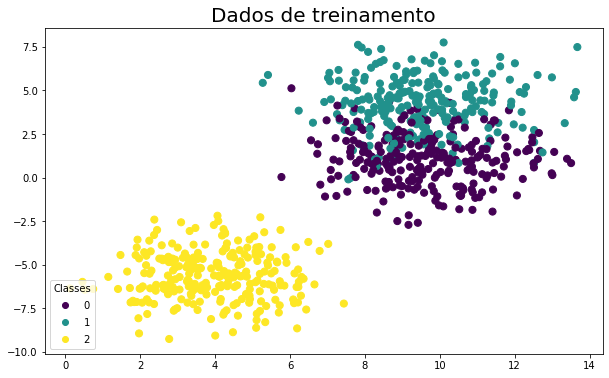

In [141]:
fig, ax = plt.subplots(figsize = (10,6))
scatter = ax.scatter(X_train[:,0], X_train[:,1], c=y_train, marker= 'o', s=50)
legend1 = ax.legend(*scatter.legend_elements(), loc="lower left", title="Classes")
plt.title("Dados de treinamento", fontsize=20);

In [98]:
knn1 = KNeighborsClassifier(n_neighbors=1) 
knn5 = KNeighborsClassifier(n_neighbors=5)

In [99]:
knn1.fit(X_train, y_train)
knn5.fit(X_train, y_train)

KNeighborsClassifier()

In [100]:
y_pred_1 = knn1.predict(X_test)
y_pred_5 = knn5.predict(X_test)

In [101]:
from sklearn.metrics import accuracy_score
print("Accuracy of kNN with k=1", accuracy_score(y_test, y_pred_1))
print("Accuracy of kNN with k=5", accuracy_score(y_test, y_pred_5))

Accuracy of kNN with k=1 0.848
Accuracy of kNN with k=5 0.892


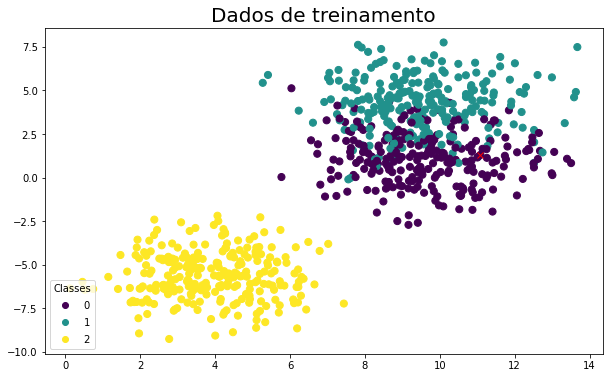

In [144]:
fig, ax = plt.subplots(figsize = (10,6))
plt.title("Dados de treinamento", fontsize=20);
scatter = ax.scatter(X_train[:,0], X_train[:,1], c=y_train, marker= 'o', s=50)

legend1 = ax.legend(*scatter.legend_elements(), loc="lower left", title="Classes")

ax.plot(X-tes[0,0], X_train[0, 1], 'rx', );

In [124]:
y_train[10]

2

## Como escolher o valor de K?
<div>
<img src="imagens/classificadores/knn-qual-classe.png" width="450"/>
</div>


- k deve ser grande para minimizar o erro
- Valores pequenos de k levam a fronteiras ruidosas
- Utilizar uma base de validação para definir o valor de k

In [65]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV

In [14]:
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

In [15]:
knn_grid = GridSearchCV(estimator = KNeighborsClassifier(), 
                        param_grid={'n_neighbors': np.arange(1,20)}, cv=5)

In [16]:
knn_grid.fit(X_cancer, y_cancer)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [73]:
knn_grid._bes

{'n_neighbors': 13}

#### Agora que encontramos o valor ótimo de K, vamos treinar um classificador e avaliar as métricas. 